# Airbnb Open Data

### Dataset from Kaggle:
https://www.kaggle.com/datasets/arianazmoudeh/airbnbopendata/data

This project explores the dynamics of New York City's rental market by analyzing a dataset containing key variables such as property prices, service fees, room types, availability, reviews and many more. The primary goal is to find patterns and trends that distinguish different neighborhoods and their corresponding groups which are: Manhattan, Brooklyn, and Queens, by examining factors like average prices, service fees, and listing availability.

We looked into questions like: How do property prices vary geographically across these neighbourhoods?
Are service fees approximately the same regardless of location?
What factors might influence the availability of listings or the choice of cancellation policies?
By using visualization techniques, including scatter plots, histograms, and bar charts, and applying methods for data cleaning, grouping, and numerical encoding, this analysis provides a brief overview of the market in New York City.

In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sn

In [5]:
data = pd.read_csv("Data/Airbnb_Open_Data.csv")
data.head()

C:\Users\kaito\AppData\Local\Temp\ipykernel_15080\2803188584.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Data/Airbnb_Open_Data.csv")


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [6]:
data.shape

(102599, 26)

In [7]:
#DataFrame structure
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

## Data Cleaning

In [9]:
#Dropping unwanted columns
data.drop(["id", "NAME", "host id", "host_identity_verified", "host name", "last review", "house_rules", "license"], axis=1, inplace=True)

In [10]:
#Identifying the count of missing values
data.isna().sum()

neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
country                             532
country code                        131
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
dtype: int64

In [11]:
#Droppping the missing values
data.dropna(inplace = True)
data.isna().sum()

neighbourhood group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country code                      0
instant_bookable                  0
cancellation_policy               0
room type                         0
Construction year                 0
price                             0
service fee                       0
minimum nights                    0
number of reviews                 0
reviews per month                 0
review rate number                0
calculated host listings count    0
availability 365                  0
dtype: int64

In [12]:
#Displaying the count of listings in each neighbourhood group
data["neighbourhood group"].value_counts()

neighbourhood group
Brooklyn         35112
Manhattan        35050
Queens           11273
Bronx             2305
Staten Island      830
brookln              1
Name: count, dtype: int64

In [13]:
# Filtering out "Bronx" and "Staten Island"
data["neighbourhood group"] = data["neighbourhood group"].str.replace("brookln", "Brooklyn")
data = data.loc[~data["neighbourhood group"].isin(["Bronx", "Staten Island"])]
data["neighbourhood group"].value_counts()

neighbourhood group
Brooklyn     35113
Manhattan    35050
Queens       11273
Name: count, dtype: int64

In [14]:
data.neighbourhood.value_counts()

neighbourhood
Bedford-Stuyvesant    6848
Williamsburg          6418
Harlem                4633
Bushwick              4038
Hell's Kitchen        3227
                      ... 
Breezy Point             7
Little Neck              6
Holliswood               5
Gerritsen Beach          3
Glen Oaks                2
Name: count, Length: 132, dtype: int64

In [15]:
#Grouping the less frequent neighborhoods into "Other" 

neighbourhood_counts = data.neighbourhood.value_counts()
cleaned_neighbourhoods = []

for neighbourhood in data.neighbourhood:
    if neighbourhood_counts[neighbourhood] >= 1000:
        cleaned_neighbourhoods.append(neighbourhood)
    else:
        cleaned_neighbourhoods.append("Other")

data["neighbourhood"] = cleaned_neighbourhoods
print(data["neighbourhood"].value_counts())

neighbourhood
Other                        26666
Bedford-Stuyvesant            6848
Williamsburg                  6418
Harlem                        4633
Bushwick                      4038
Hell's Kitchen                3227
Upper West Side               3040
Upper East Side               2974
East Village                  2831
Crown Heights                 2731
Midtown                       2451
East Harlem                   2017
Chelsea                       1789
Greenpoint                    1680
Lower East Side               1622
Astoria                       1544
Washington Heights            1451
West Village                  1210
Financial District            1121
Flatbush                      1076
East Flatbush                 1060
Prospect-Lefferts Gardens     1009
Name: count, dtype: int64


In [16]:
data.country.value_counts()

country
United States    81436
Name: count, dtype: int64

In [17]:
data["country code"].value_counts()

country code
US    81436
Name: count, dtype: int64

In [18]:
data.drop(["country", "country code"], axis=1, inplace=True)

In [19]:
#Counts how many times each unique value appears in the column
#It indicates whether listings can be booked instantly (True) or not (False)
data.instant_bookable.value_counts()

instant_bookable
False    40963
True     40473
Name: count, dtype: int64

In [20]:
data["instant_bookable"] = np.uint8(data.instant_bookable == True)

In [21]:
data.cancellation_policy.value_counts()

cancellation_policy
moderate    27284
strict      27128
flexible    27024
Name: count, dtype: int64

In [22]:
data["room type"].value_counts()

room type
Entire home/apt    43426
Private room       36330
Shared room         1571
Hotel room           109
Name: count, dtype: int64

In [23]:
data["Construction year"].value_counts()

Construction year
2008.0    4204
2006.0    4181
2019.0    4167
2014.0    4141
2015.0    4133
2017.0    4099
2005.0    4099
2018.0    4086
2009.0    4085
2010.0    4070
2012.0    4057
2020.0    4044
2003.0    4042
2011.0    4038
2007.0    4037
2016.0    4028
2021.0    4027
2022.0    4004
2004.0    3966
2013.0    3928
Name: count, dtype: int64

In [24]:
data.price.value_counts()

price
$206       122
$833       109
$890       108
$481       108
$1,056     107
          ... 
$704        44
$953        43
$786        42
$187        40
$89         36
Name: count, Length: 1151, dtype: int64

In [25]:
data["service fee"].value_counts()

service fee
$216     443
$41      432
$127     424
$177     422
$99      413
        ... 
$73      302
$58      294
$202     285
$10      216
$240     204
Name: count, Length: 231, dtype: int64

In [26]:
#Converting string values into a numeric.
data["price"] = data["price"].str.replace("$", "").str.replace(",", "").astype(float)
data["service fee"] = data["service fee"].str.replace("$", "").str.replace(",", "").astype(float)

In [27]:
data["minimum nights"].value_counts()

minimum nights
2.0      19973
1.0      19806
3.0      13472
30.0      8995
4.0       5382
         ...  
74.0         1
198.0        1
273.0        1
53.0         1
825.0        1
Name: count, Length: 123, dtype: int64

In [28]:
#Filtering to count only the occurences where the minimum nights column values fall between 1 and 30
data = data[(data["minimum nights"] >= 1) & (data["minimum nights"] <= 30)]
data["minimum nights"].value_counts()

minimum nights
2.0     19973
1.0     19806
3.0     13472
30.0     8995
4.0      5382
5.0      4789
7.0      2896
6.0      1246
14.0      762
10.0      695
15.0      385
28.0      340
20.0      282
29.0      244
8.0       203
21.0      171
9.0       122
12.0      120
25.0      118
13.0       82
11.0       43
18.0       35
16.0       25
27.0       25
26.0       19
17.0       15
23.0       12
19.0       11
24.0       10
22.0        9
Name: count, dtype: int64

In [29]:
data["number of reviews"].value_counts()

number of reviews
1.0      9734
2.0      6686
3.0      5051
4.0      3866
5.0      3220
         ... 
469.0       1
406.0       1
483.0       1
648.0       1
300.0       1
Name: count, Length: 469, dtype: int64

In [30]:
data["review rate number"].value_counts()

review rate number
5.0    18332
2.0    18292
3.0    18246
4.0    18234
1.0     7183
Name: count, dtype: int64

In [31]:
data["calculated host listings count"].value_counts()

calculated host listings count
1.0      48962
2.0      12086
3.0       5550
4.0       2916
5.0       1672
         ...  
58.0        12
218.0        8
80.0         7
46.0         5
65.0         2
Name: count, Length: 78, dtype: int64

In [32]:
data["availability 365"].value_counts()

availability 365
 0.0       17568
 365.0      1670
 364.0       764
 1.0         636
 5.0         531
           ...  
-7.0          25
-6.0          24
 408.0        21
 391.0        20
 3677.0        1
Name: count, Length: 438, dtype: int64

In [33]:
#Include only rows where the values in the availability 365 column are between 0 and 365
data = data[(data["availability 365"] >= 0) & (data["availability 365"] <= 365)]

In [34]:
data.head()

,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,Brooklyn,Other,40.64749,-73.97237,0,strict,Private room,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,Manhattan,Midtown,40.75362,-73.98377,0,moderate,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
3,Brooklyn,Other,40.68514,-73.95976,1,moderate,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,Manhattan,East Harlem,40.79851,-73.94399,0,moderate,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
8,Manhattan,Hell's Kitchen,40.76489,-73.98493,1,strict,Private room,2005.0,1018.0,204.0,2.0,430.0,3.47,3.0,1.0,180.0


In [35]:
data.shape

(77853, 16)

In [36]:
# Converting the neighbourhood groups into labels
data_label_dict = dict(zip(data["neighbourhood group"].value_counts().index, range(len(data["neighbourhood group"].unique()))))
data_label_dict

{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2}

In [37]:
room_label_dict = dict(zip(data["room type"].value_counts().index, range(len(data["room type"].unique()))))
room_label_dict

{'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3}

In [38]:
# transforms all our columns in the data DataFrame into numerical values
num_data = data.copy()
for column in num_data.columns:
    if num_data[column].dtype == "object":
        unique_labels = num_data[column].value_counts().index
        unique_nums = {val: i for i, val in enumerate(unique_labels)}
        num_data[column] = num_data[column].replace(unique_nums).astype("int32")

num_data.head()

C:\Users\kaito\AppData\Local\Temp\ipykernel_15080\308150438.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  num_data[column] = num_data[column].replace(unique_nums).astype("int32")
C:\Users\kaito\AppData\Local\Temp\ipykernel_15080\308150438.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  num_data[column] = num_data[column].replace(unique_nums).astype("int32")
C:\Users\kaito\AppData\Local\Temp\ipykernel_15080\308150438.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future versi

,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,0,0,40.64749,-73.97237,0,1,1,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,1,10,40.75362,-73.98377,0,0,0,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
3,0,0,40.68514,-73.95976,1,0,0,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,1,11,40.79851,-73.94399,0,0,0,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
8,1,5,40.76489,-73.98493,1,1,1,2005.0,1018.0,204.0,2.0,430.0,3.47,3.0,1.0,180.0


## Data Visualization

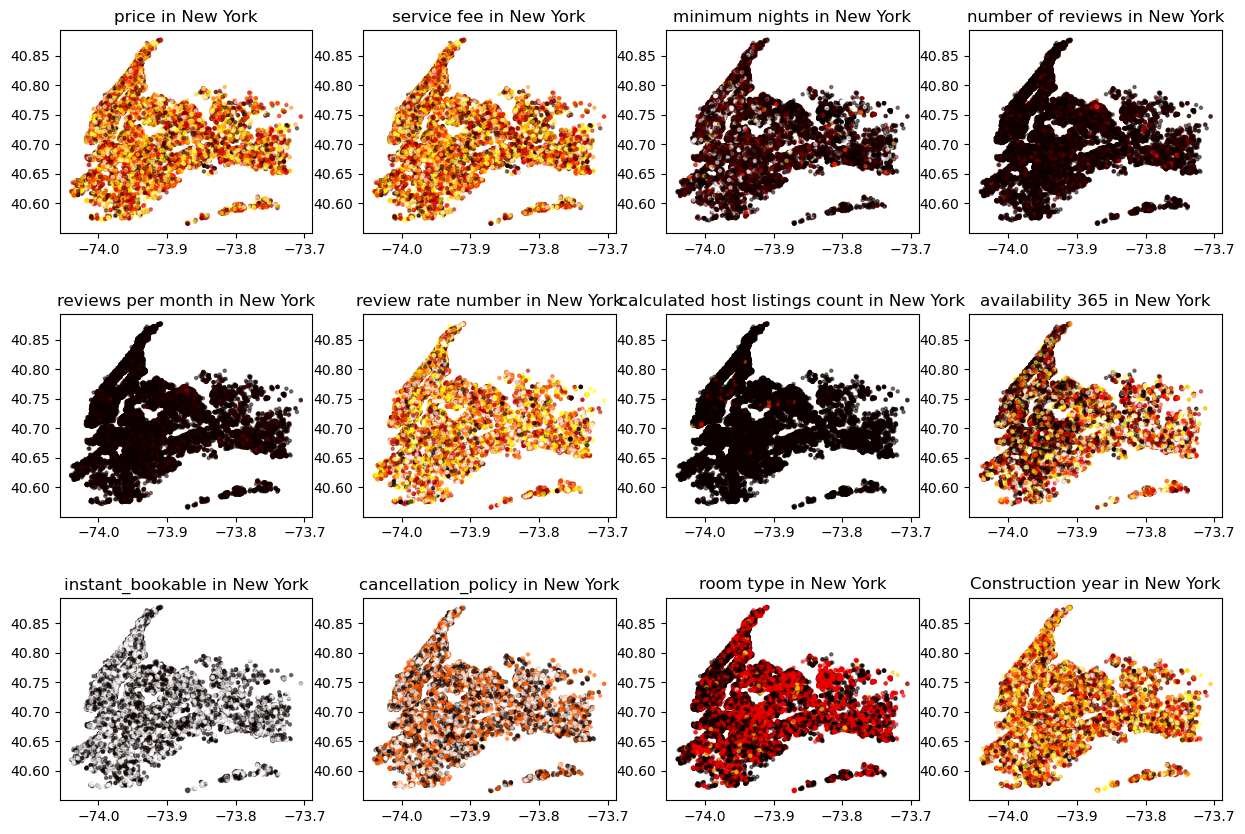

In [40]:
# creating scatter plots that visualizes multiple variables from our dataset
fig = plt.figure(figsize=(15, 10))
fig.subplots_adjust(hspace=0.4)

data_list = ["price", "service fee", "minimum nights", "number of reviews", 
             "reviews per month", "review rate number", "calculated host listings count", "availability 365",
             "instant_bookable", "cancellation_policy", "room type", "Construction year"]

for i in range(len(data_list)):
    ax = fig.add_subplot(3, 4, i + 1)
    ax.scatter(num_data.long, num_data.lat, c=num_data[data_list[i]], cmap="hot", alpha=0.5, s=5)
    ax.title.set_text(data_list[i] + " in New York")

plt.show()

#### Price in New York:
This graph shows the distribution of prices for Airbnb listings across the locations in New York.
The color intensity represents the price, with darker colors indicating higher prices.
We can see that there are areas with higher prices, likely in more central or the more wanted locations.

#### Service fee in New York:

This graph shows the distribution of service fees charged by Airbnb for listings in New York.
We can observe that service fees tend to be higher in areas with higher prices.

#### Minimum Nights in New York:

This graph shows the distribution of the minimum number of nights required for a booking in New York.
We can see that there are areas with higher minimum nights, possibly due to stricter regulations or landlord preferences.

#### Number of Reviews in New York:

This graph shows the distribution of the number of reviews for Airbnb listings in New York.
We can see that there are areas with a higher concentration of reviews, indicating more popular or established listings.

#### Reviews per Month in New York:

This graph shows the distribution of the number of reviews per month for Airbnb listings in New York.
We can see that there are areas with a higher rate of reviews, indicating more active listings.

#### Review Rate Number in New York:

This graph likely shows the distribution of the average review rating for Airbnb listings in New York.
We can see that there are areas with higher average ratings, indicating better-rated listings.

#### Calculated Host Listings Count in New York:

This graph shows the distribution of the number of listings each host has in New York.
We can see that there are areas with a higher concentration of hosts with multiple listings, indicating potential professional hosts.

#### Availability 365 in New York:

This graph shows the distribution of the number of days a listing is available for booking throughout the year.
We can see that there are areas with higher availability, indicating listings that are more frequently available for booking.

In [42]:
def average_calculation(list, group_name, numerical_data_name):
    average = [0.0]*len(list)
    avg_dict = dict(zip(list, average))

    for x in list:
        x_data = data[data[group_name] == x]
        for value in x_data[numerical_data_name]:
            avg_dict[x] += value
        avg_dict[x] /= len(x_data)

    sorted_avg_dict = dict(sorted(avg_dict.items(), key = lambda x : x[1]))
    return sorted_avg_dict

In [43]:
def two_barplots_comparison(dict1, dict2, title1, title2, xlabel1, xlabel2, ylabel1, ylabel2):
    fig = plt.figure(figsize=(14, 6))

    ax1 = fig.add_subplot(1, 2, 1)
    sn.barplot(x=dict1.keys(), y=dict1.values(), ax=ax1)
    ax1.set_xlabel(xlabel1)
    ax1.set_ylabel(ylabel1)
    ax1.set_title(title1)
    ax1.set_xticks(range(len(dict1)))
    ax1.set_xticklabels(list(dict1.keys()), rotation=90)
    
    ax2 = fig.add_subplot(1, 2, 2)
    sn.barplot(x=dict2.keys(), y=dict2.values(), ax=ax2)
    ax2.set_xlabel(xlabel2)
    ax2.set_ylabel(ylabel2)
    ax2.set_title(title2)
    ax2.set_xticks(range(len(dict2)))
    ax2.set_xticklabels(list(dict2.keys()), rotation=90)
    
    plt.show()

{'Manhattan': 624.4612863457318, 'Brooklyn': 628.0835711737424, 'Queens': 629.0355839416059}
{'Manhattan': 124.89403734552124, 'Brooklyn': 125.61713640147461, 'Queens': 125.80602189781023}


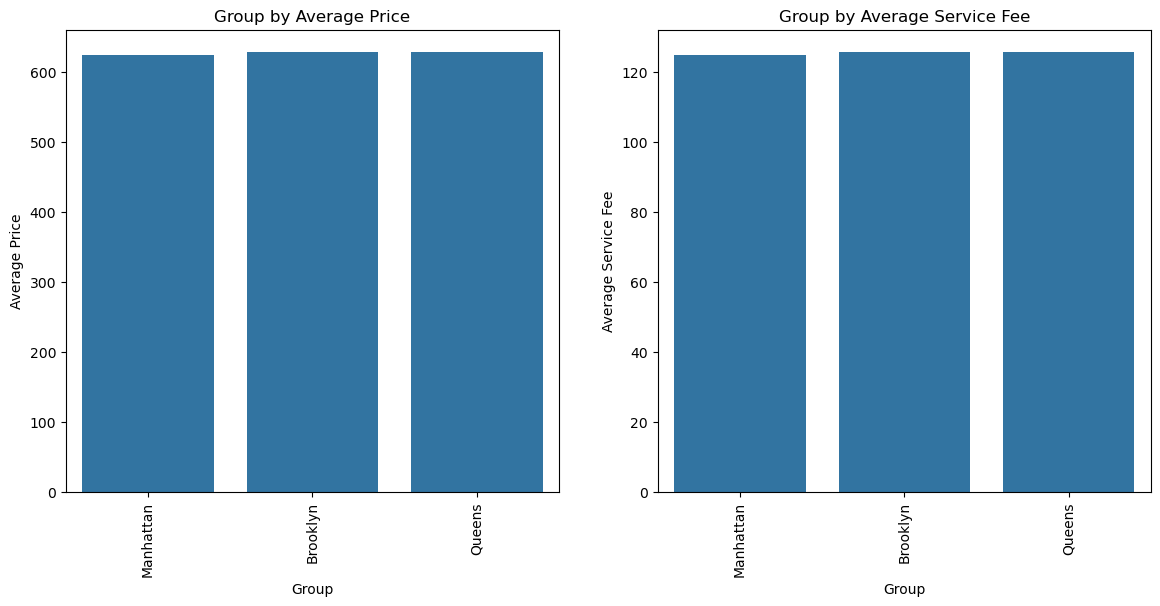

In [44]:
neighbourhood_groups = list(data["neighbourhood group"].unique())

# Calculate average prices for neighbourhood groups
group_avg_price = average_calculation(neighbourhood_groups, "neighbourhood group", "price")
print(group_avg_price)

# Calculate service fees for neighbourhood groups
group_avg_service = average_calculation(neighbourhood_groups, "neighbourhood group", "service fee")
print(group_avg_service)

two_barplots_comparison(group_avg_price, group_avg_service, "Group by Average Price", "Group by Average Service Fee",
                        "Group", "Group", "Average Price", "Average Service Fee")

So here we are  calculating and visualizing the average price and service fee for different neighbourhood groups in the dataset. First, it defines the #average_calculation function, which computes the average of a specified numerical variable for each unique group in a categorical variable. Using this #function, the average price and service fee are calculated for each neighbourhood group.

The first bar chart shows the average price of Airbnb listings in each of the neighbourhoods we chose.
Manhattan, Queens and Brooklyn have approximately the same average price.


The second bar chart shows the average service fee charged by Airbnb for listings in each of the neighborhoods.
The service fees are very similar across all three neighborhoods.

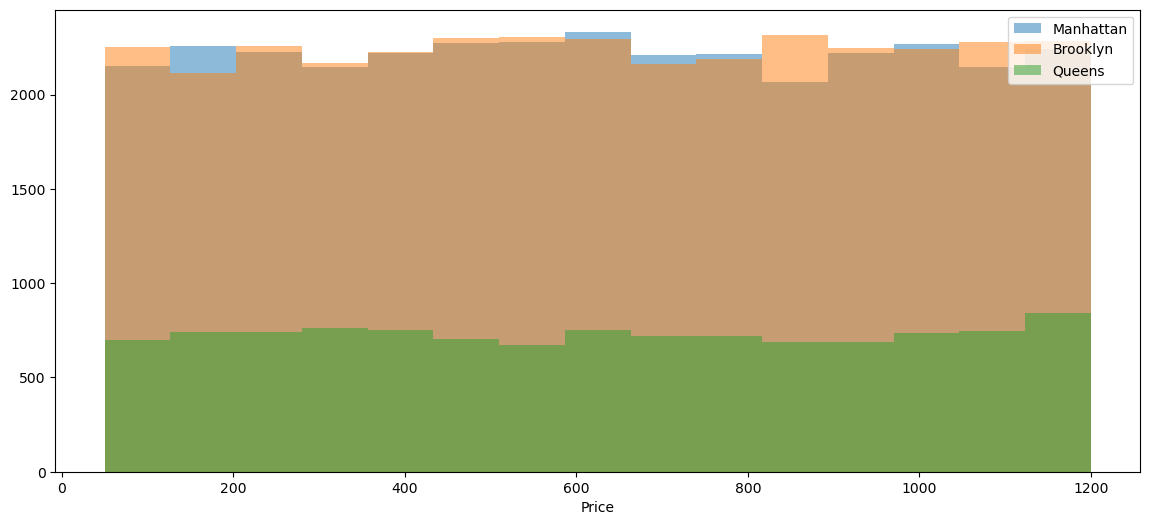

In [46]:
fig = plt.figure(figsize=(14, 6))
plt.hist(data[data["neighbourhood group"] == "Manhattan"].price, bins=15, alpha=0.5, label="Manhattan")
plt.hist(data[data["neighbourhood group"] == "Brooklyn"].price, bins=15, alpha=0.5, label="Brooklyn")
plt.hist(data[data["neighbourhood group"] == "Queens"].price, bins=15, alpha=0.5, label="Queens")
plt.xlabel("Price")
plt.legend()
plt.show()

The three variables are overlapping, which means that price distributions in Manhattan, Brooklyn, and Queens share similar ranges for many listings.

#### Key Differences:
    
* Manhattan: The blue represents higher prices compared to Brooklyn and Queens, as Manhattan is generally known for its properties.

* Brooklyn: The orange rectangles shows a wider price range, suggesting a more diverse set of properties with varying price points.

* Queens: The green rectangles represents generally lower prices, with fewer high-price outliers compared to Manhattan and Brooklyn.

The most frequent price range is likely the same across the three groups, but Queens seems to dominate the lower price ranges.

[[17144 15895   590     7]
 [19695 12814   654    94]
 [ 4367  6314   271     8]] 

{'Brooklyn': 0, 'Manhattan': 1, 'Queens': 2}
{'Entire home/apt': 0, 'Private room': 1, 'Shared room': 2, 'Hotel room': 3}


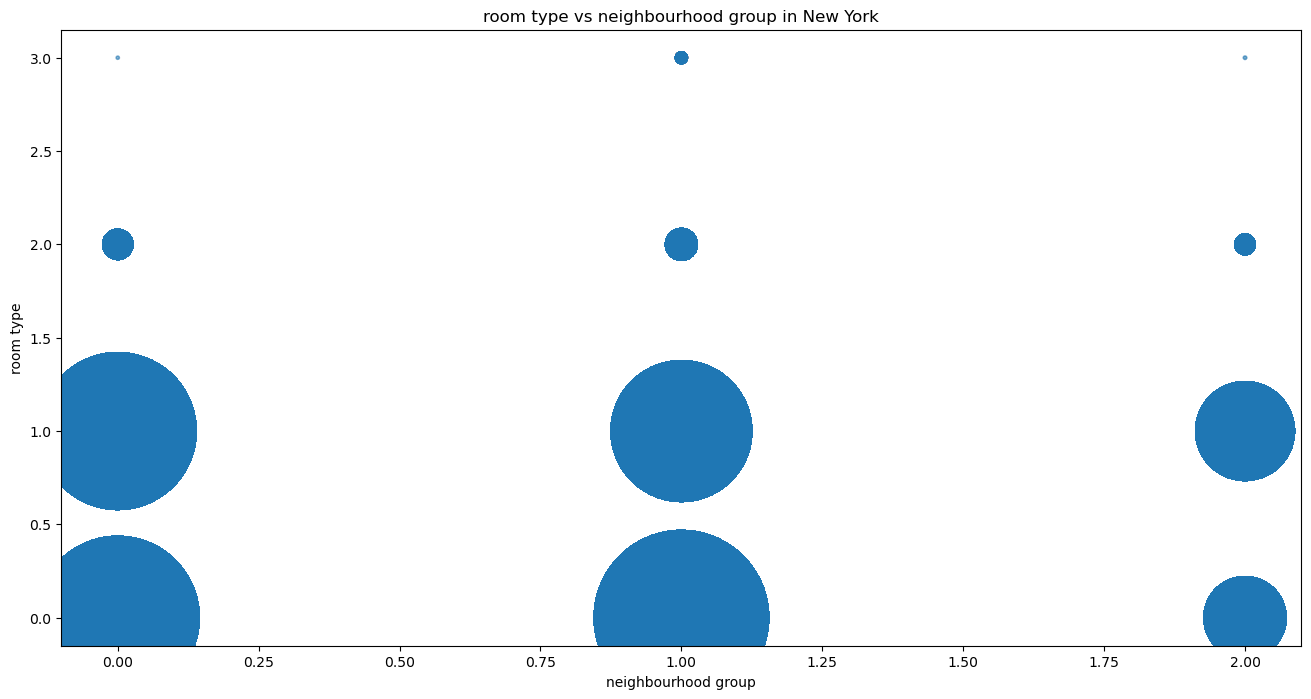

In [48]:
z = np.zeros([len(num_data["neighbourhood group"].unique()), len(num_data["room type"].unique())], "uint16")

for x in num_data["neighbourhood group"].unique():
    group_rows = num_data[num_data["neighbourhood group"] == x]
    columns = group_rows["room type"].unique()
    for y in columns:
        z[x, y] = len(group_rows[group_rows["room type"] == y])
print(z, "\n")

print(data_label_dict)
print(room_label_dict)

fig = plt.figure(figsize=(16, 8))
plt.scatter(num_data["neighbourhood group"], num_data["room type"], s=z[num_data["neighbourhood group"], num_data["room type"]]*0.8, alpha=0.1)
plt.xlabel("neighbourhood group")
plt.ylabel("room type")
plt.title("room type vs neighbourhood group in New York")
plt.show()

#### Neighbourhood group
* 0 (Left): Brooklyn
* 1 (Middle): Manhattan
* 2 (Right): Queens

#### Room type
* 0: Entire home/apt
* 1: Private room
* 2: Shared room
* 3: Hotel room

The size of the bubbles represents the frequency or count of listings within each combination of room type and neighborhood group. Therefore, the larger bubbles indicate a higher number of listings, and all neighbourhood group show a large number of entire home or apt and private room.

Throughout, the bubble size decreases as the number of room types goes up, but in Queens, the bubble size of entire home/spt is smaller than the bubble size of private room. As for hotel room, the sizes are quite small and might not be chosen due to the high cost.

In [50]:
brooklyn_data = data[data['neighbourhood group'] == 'Brooklyn']
manhattan_data = data[data['neighbourhood group'] == 'Manhattan']
queens_data = data[data['neighbourhood group'] == 'Queens']

In [51]:
def create_bar_chart(data, title):
   
    room_type_counts = data['room type'].value_counts(normalize=True)
    
    plt.figure(figsize=(10, 6))
    plt.bar(room_type_counts.index, room_type_counts.values, color='orange', alpha=0.7)
    plt.title(title)
    plt.xlabel("Room Type")
    plt.ylabel("Frequency")
    plt.grid(axis='y', alpha=0.3)
    plt.show()

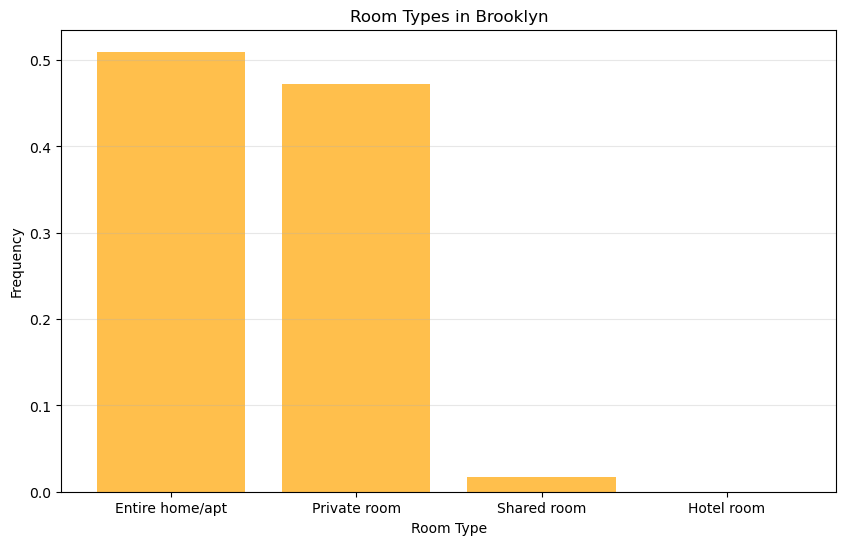

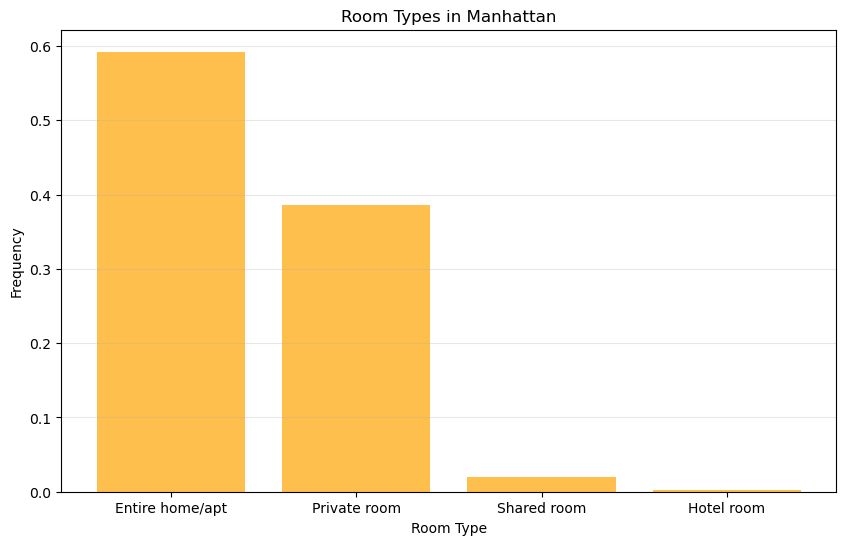

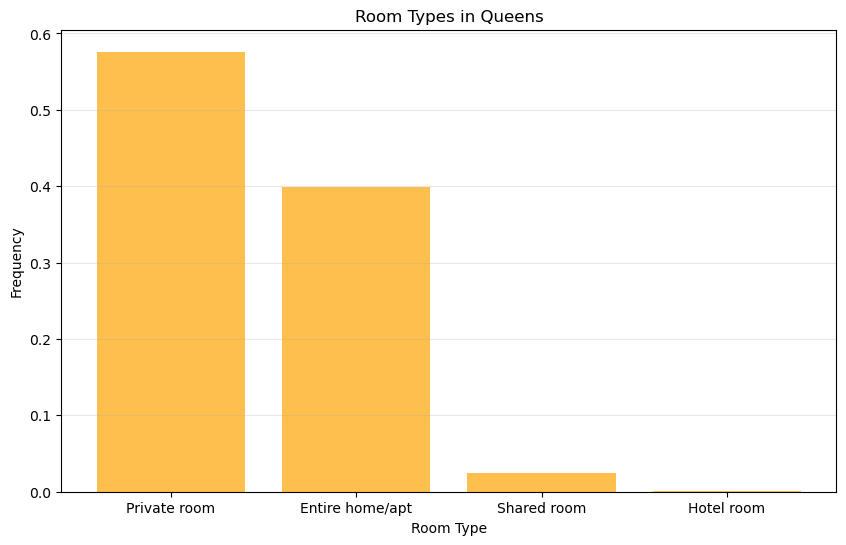

In [52]:
create_bar_chart(brooklyn_data, "Room Types in Brooklyn")
create_bar_chart(manhattan_data, "Room Types in Manhattan")
create_bar_chart(queens_data, "Room Types in Queens")

#### Room Types in Brooklyn:
As we can see from the bar charts the number of listings for Brooklyn is higher when it is an entire room or an apartment room and private room. Both of those room types are about 0.5, and there is a huge difference from shared rooms and hetel rooms listings.

#### Room Types in Manhattan: 
Unlike Brooklyn, there is a difference of about 0.2 in the entire home or an aprtment type to private room type ratio in Manhattan, while small numbers for shared room and hotel room type are the same as in Brooklyn.

#### Room Types in Queens:
The room type listings for Queens are quite different than the ones in Brooklyn and Manhattan. As we can see the number of listings for private rooms is the highest, following it by the entire home/ apartments and then with the lowest listings are the shared rooms and the hotels rooms.

## Split Data into Training and Testing (20%) Set

In [55]:
# Labels the neighbourhood group as string
labels = np.asarray(data["neighbourhood group"])

# Labels the neighbourhood group as numerical
num_labels = np.asarray(num_data["neighbourhood group"])

# Removes neighbourhood group, neighbourhood, latitude, and longitude from the numerical data
num_data = num_data.iloc[:, 4:]
num_data.head()

,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
0,0,1,1,2020.0,966.0,193.0,10.0,9.0,0.21,4.0,6.0,286.0
1,0,0,0,2007.0,142.0,28.0,30.0,45.0,0.38,4.0,2.0,228.0
3,1,0,0,2005.0,368.0,74.0,30.0,270.0,4.64,4.0,1.0,322.0
4,0,0,0,2009.0,204.0,41.0,10.0,9.0,0.10,3.0,1.0,289.0
8,1,1,1,2005.0,1018.0,204.0,2.0,430.0,3.47,3.0,1.0,180.0


In [56]:
from sklearn.model_selection import train_test_split

# 20% test size
X_train, X_test, y_train, y_test = train_test_split(num_data, num_labels, test_size=0.2, random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62282, 12)
(15571, 12)
(62282,)
(15571,)


## Evaluation for Multiple Classes

We will use a evaluation function that used in class, but it is revised for multiple classes to see the training and testing predictions visually.

In [60]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))], average='micro')
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))], average='micro')
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions, average='micro')
    results['precision'] = precision_score(y_test, predictions, average='micro')
    results['roc'] = roc_auc_score(y_test, probs, average='micro', multi_class='ovr')
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions, average='micro')
    train_results['precision'] = precision_score(y_train, train_predictions, average='micro')
    train_results['roc'] = roc_auc_score(y_train, train_probs, average='micro', multi_class='ovr')
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16

    for i in range(probs.shape[1]):  # Iterate through classes
        fpr, tpr, _ = roc_curve(y_test, probs[:, i], pos_label=i)
        plt.plot(fpr, tpr, label=f'Class {i} ROC')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
    plt.legend()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.show()

## Random Forest

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_

Accuracy Score:
Train:  1.0
Test:  0.7327082396763214 

Recall Baseline: 0.43 Test: 0.73 Train: 1.0
Precision Baseline: 0.43 Test: 0.73 Train: 1.0
Roc Baseline: 0.5 Test: 0.9 Train: 1.0


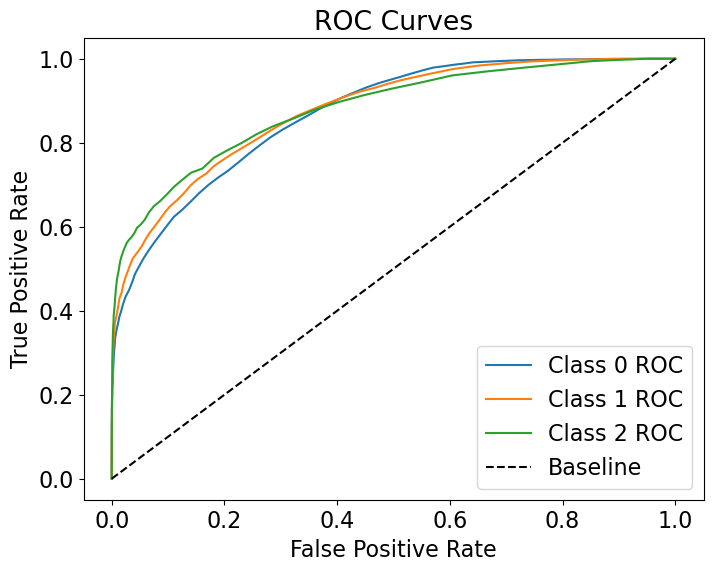

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1)
rf_model.fit(X_train, y_train)

train_rf_predictions = rf_model.predict(X_train)
train_rf_probs = rf_model.predict_proba(X_train)

rf_predictions = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)

print("Accuracy Score:")
print("Train: ", accuracy_score(y_train, train_rf_predictions))
print("Test: ", accuracy_score(y_test, rf_predictions), "\n") 

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

The three class lines overlap when close to the baseline, and intersect at 0.4 false positive rate and about 0.9 true positive rate, but not other parts. In addition, the test accurancy results are better than the baseline's one, indicating that the model has the ability to learn patters and separate classes.

However, this model achieves perfect accuracy on the training dataset, and the test accurancy is lower than the train accuracy. 73% test accurancy is not bad, but the accurancy and the perfect train accurancy show the overfitting.

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74      6777
           1       0.75      0.74      0.75      6678
           2       0.86      0.50      0.63      2116

    accuracy                           0.73     15571
   macro avg       0.77      0.68      0.71     15571
weighted avg       0.74      0.73      0.73     15571



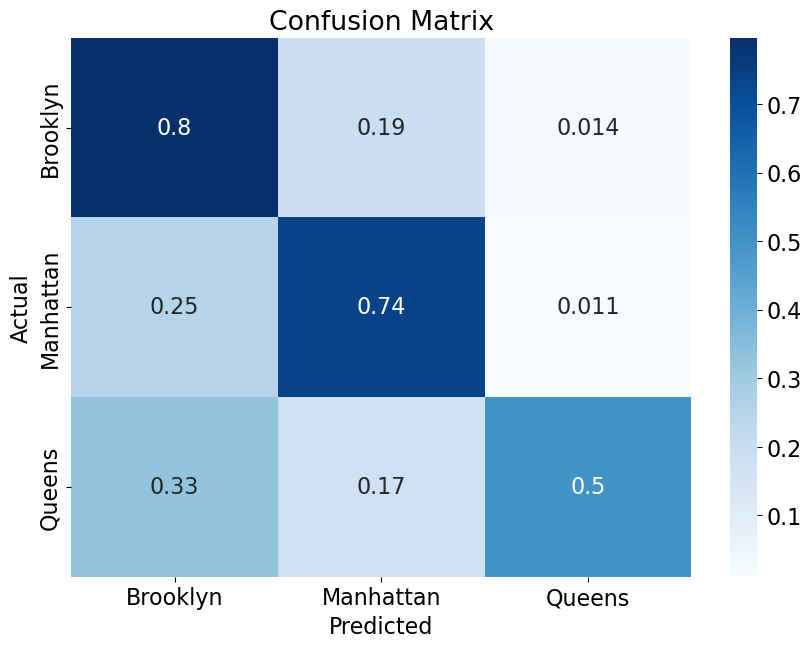

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# normalized matrix
numClasses = 3
conf = np.zeros([numClasses, numClasses])
guesses = rf_predictions

for group in range(len(y_test)):
    real = y_test[group]
    guess = guesses[group]
    conf[real, guess] = conf[real, guess] + 1
 
rowsums = np.sum(conf, 1)
rowsums = np.reshape(rowsums, [numClasses,1])
rowsums = np.repeat(rowsums, numClasses, axis = 1)
conf = conf / rowsums
df_cm = pd.DataFrame(conf, index = [i for i in data_label_dict.keys()],
                  columns = [i for i in data_label_dict.keys()])

plt.figure(figsize = (10,7))
ax = sn.heatmap(df_cm, annot=True, cmap= 'Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

While the model performs well in Brooklyn and Manhattan, which is shown by high recall and balanced percision, this model performs poorly in Queens. This is likely due to class imbalances.

Feature Importances:
                           feature  importance
8                 instant_bookable    0.142908
4                reviews per month    0.134618
5               review rate number    0.123403
11               Construction year    0.121196
7                 availability 365    0.116126
3                number of reviews    0.104604
10                       room type    0.070534
6   calculated host listings count    0.056483
9              cancellation_policy    0.056462
1                      service fee    0.033073
2                   minimum nights    0.020312
0                            price    0.020279


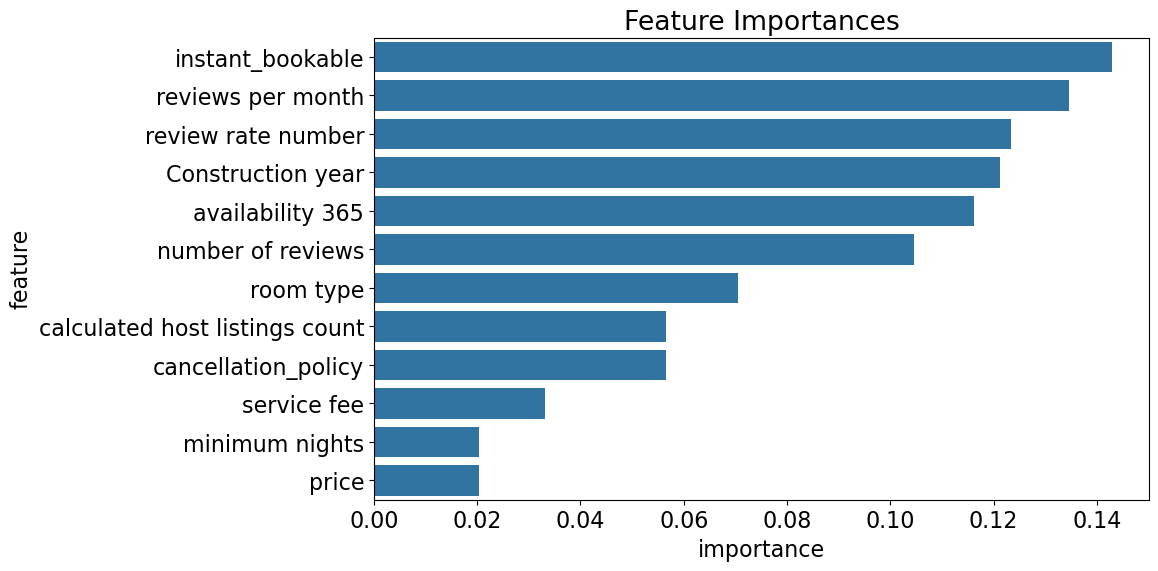

In [66]:
feature_importances = pd.DataFrame({"feature": data_list, "importance": rf_model.feature_importances_
                                   }).sort_values (by="importance", ascending=False)
print ("Feature Importances:")
print (feature_importances)

plt.figure(figsize=(10, 6))
sn.barplot(data=feature_importances, x="importance", y="feature")
plt.title("Feature Importances")
plt.show()

The most important feature is instant bookable, and then followed reviews per month, review rate number, construction year, and availability. Their features significantly impacts the prediction. Number of reviews and room type also affect, but not strongly, and others have lower importance scores. The least importnat features are price and minimum nights, and they are about 0.02. Prices should be important factors for users, but the least important is likely due to the small variation in prices across the dataset as shown in the bar plots and histograms. Prices also may be influenced by other features such as reviews and age of building.

## Class Weight Change

In [69]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

print("Class Weights:", class_weight_dict)

Class Weights: {0: 0.7729500974223413, 1: 0.7810928427204434, 2: 2.34742951907131}


Accuracy Score:
Train:  1.0
Test:  0.7295613640742405 

Recall Baseline: 0.43 Test: 0.73 Train: 1.0
Precision Baseline: 0.43 Test: 0.73 Train: 1.0
Roc Baseline: 0.5 Test: 0.9 Train: 1.0


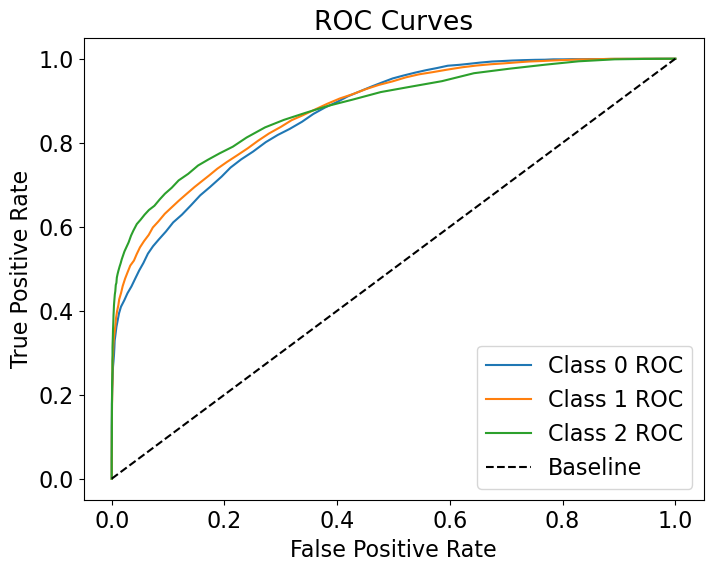

In [70]:
weighted_rf_classifier = RandomForestClassifier(random_state=42, class_weight=class_weight_dict)

weighted_rf_classifier.fit(X_train, y_train)

train_rf_predictions = weighted_rf_classifier.predict(X_train)
train_rf_probs = weighted_rf_classifier.predict_proba(X_train)

rf_predictions = weighted_rf_classifier.predict(X_test)
rf_probs = weighted_rf_classifier.predict_proba(X_test)

print("Accuracy Score:")
print("Train: ", accuracy_score(y_train, train_rf_predictions))
print("Test: ", accuracy_score(y_test, rf_predictions), "\n")

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

## Best Model

In [72]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = 42)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=42)

# Fit 
rs.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\kaito\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\kaito\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\kaito\Anaconda\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\kaito\Anaconda\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\kaito\Anaconda\Lib\site-packages\sklearn

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                                      5, 5, 6, 6, 6, 7, 7, 7, 8,
                                                      8, 8, 9, 9, 9, 10, 10, 10,
                                                      11, 11, 12, 12, 12, ...],
                                        'max_features': ['auto', 'sqrt', None,
                                                         0.5, 0.6, 0.7,
                                                         0.7999999999999999,
                                                         0.8999999999999999],
                                        'max_leaf_nodes': [None, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 10,
                                                           10, 10, 10, 10, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 11, 11, 11, 11,
                                                           11, 12, 12, 12, 12, ...],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  13,  17,  21,  25,  29,  33,  37,  41,  44,  48,  52,  56,
        60,  64,  68,  72,  75,  79,  83,  87,  91,  95,  99, 103, 106,
       110, 114, 118, 122, 126, 130, 134, 137, 141, 145, 149, 153, 157,
       161, 165, 168, 172, 176, 180, 184, 188, 192, 196, 200])},
                   random_state=42, scoring='roc_auc', verbose=1)

Accuracy Score:
Train:  0.5140329469188529
Test:  0.5090874060753966 

Recall Baseline: 0.43 Test: 0.51 Train: 0.51
Precision Baseline: 0.43 Test: 0.51 Train: 0.51
Roc Baseline: 0.5 Test: 0.72 Train: 0.72


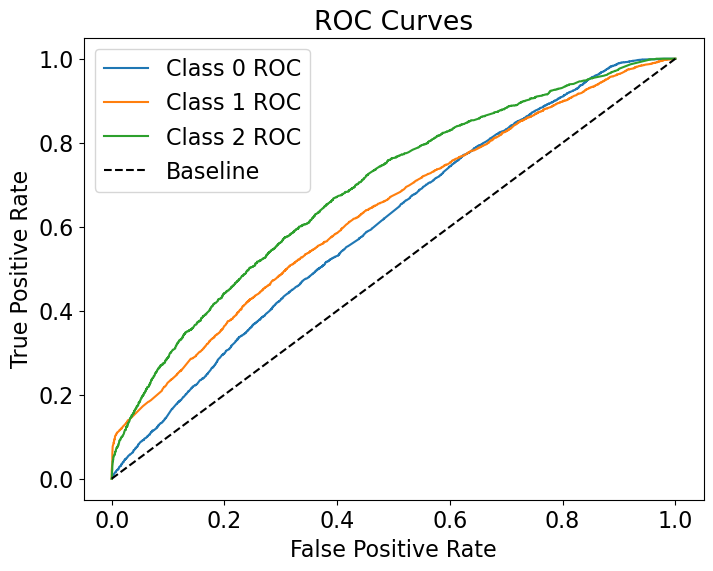

In [73]:
best_model = rs.best_estimator_

train_rf_predictions = best_model.predict(X_train)
train_rf_probs = best_model.predict_proba(X_train)

rf_predictions = best_model.predict(X_test)
rf_probs = best_model.predict_proba(X_test)

print("Accuracy Score:")
print("Train: ", accuracy_score(y_train, train_rf_predictions))
print("Test: ", accuracy_score(y_test, rf_predictions), "\n")

evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

Now, the recall, percision, and ROC AUC socres are the same for both the train and test, which suggests that this model generalizes well and is correcting the overfitting for the training data.

This model is down about 0.2 in each test score compared to the first model, but the class lines rarely overlap anymore.